In [17]:
# import numpy as np
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [19]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
data = diabetes.data
label = diabetes.target
columns = diabetes.feature_names

In [21]:
data = pd.DataFrame(data, columns = columns)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [22]:
data.shape

(442, 10)

In [23]:
# Linear Regression 모델 물러오기

from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [24]:
#  데이터 쪼개기

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2023)

In [25]:
#  혈당수치 s6

sim_lr.fit(X_train['s6'].values.reshape((-1,1)),y_train)
#  길이는 알아서(-1), data의 개수는 1개(1)

#  sklearn이 원하는 형태는 numpy 형태! -> [[1,2,3],[[4,5,6]] 형태와 같이 차원을 가진 Data의 형태를 가져야한다.
# 현재는 그냥 List에 Data 들어가 있다. / series 객체 이기 때문에 values도 가져와야한다.

LinearRegression()

In [26]:
# 예측결과 값 설정

y_pred = sim_lr.predict(X_test['s6'].values.reshape((-1,1)))
#  simple regresssion 이기 때문에 데이터는 1개씩만

In [27]:
from sklearn.metrics import r2_score
print('단순 선형 회귀, R2: {:.2f}'.format(r2_score(y_test,y_pred)))
# print('단순 선형 회귀 계수(w): {:.2f}, 절편(b): {:.2f}'.format(sim_lr.coef_[0], sim_lr.intercept_[0]))

단순 선형 회귀, R2: 0.16


[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[ 76.63014404  93.91143293 111.19272182 128.4740107  145.75529959
 163.03658848 180.31787736 197.59916625 214.88045514 232.16174402]


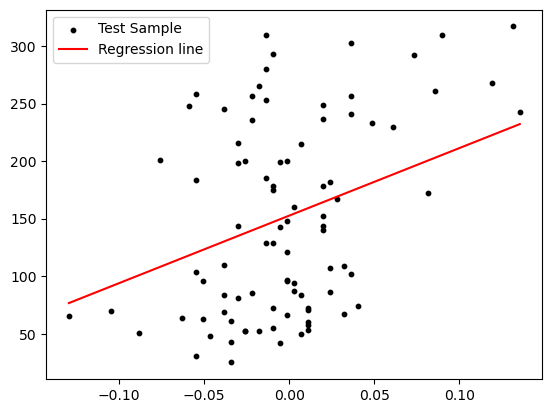

In [28]:
#  Data 시각화, Linear Line의 생성

line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
#  특정 값의 범위를 주면 그 값을 줌.
line_y = sim_lr.predict(line_x.reshape((-1,1)))
#  예측치에 대한 y값
#  하지만 x의 값과 y값이 1:1로 매칭이 안되기 때문에, x로 다시 예측을 돌려서 계수 값을 맞추기

print(line_x)
print(line_y)

# Test data를 표현
plt.scatter(X_test['s6'],y_test,s=10,c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Sample','Regression line'])
#  데이터가 너무 흩어져 있어서 0.16이 되어 있다.

In [29]:
#  Multiple Linear Regression - simple ver.

mul_lr =LinearRegression()
mul_lr.fit(X_train, y_train)
y_pred = mul_lr.predict(X_test)

# 여러개의 feature를 가져올 떄면 하나만 사용하면 편함.

In [30]:
print('다중 선형 회귀, R2: {:.2f}'.format(r2_score(y_test,y_pred)))

# 하나만 feature 보다 여러개의 feature를 이용하는 게 정확도가 높아짐.
# 여기서는 확인된 소스를 이용하기 때문에 값이 더 높게 나옴.

# classification 에서는 0.5 정말 의미없는 일이다. / 최초 0.5보단 높아야 의미있는 모델임.
# 전 방법에서는 0.16이 나옴.

다중 선형 회귀, R2: 0.50


In [31]:
#  Decision Tree Regressor : 알고리즘을 하나의 객체처럼 보겠다.

from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

#  Depth 가 너무 깊으면 Data를 너무 따라간다. 낮으면 안따라간다 -> 적당한 Depth를 for 문을 통해 찾아내는게 중요함!

In [32]:
#  Test 데이터 던져주기

dt_regr.fit(X_train['s6'].values.reshape((-1,1)),y_train)

DecisionTreeRegressor(max_depth=5)

In [33]:
#  예측치 설정하기

y_pred = dt_regr.predict(X_test['s6'].values.reshape((-1,1)))

In [34]:
print('둔순 결정 트리 회귀 R2: {:.2f}'.format(r2_score(y_test,y_pred)))

둔순 결정 트리 회귀 R2: 0.14


[-0.12948301 -0.10002803 -0.07057305 -0.04111806 -0.01166308  0.0177919
  0.04724688  0.07670187  0.10615685  0.13561183]
[118.41176471 118.41176471 118.41176471 125.75       118.63636364
 150.42857143 197.57692308 202.66666667 202.66666667 263.        ]


Text(0.5, 1.0, 'S5')

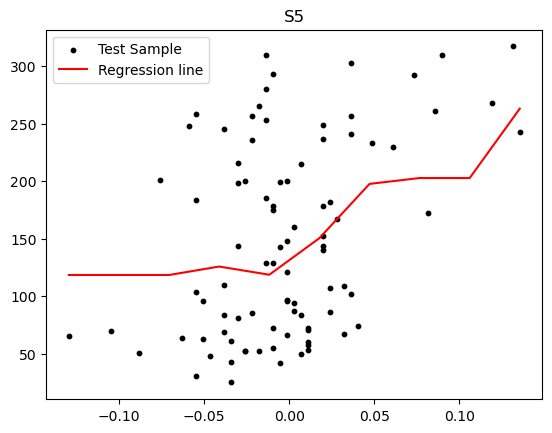

In [35]:

#  Data 시각화, Linear Line의 생성

line_x = np.linspace(np.min(X_test['s6']), np.max(X_test['s6']), 10)
#  특정 값의 범위를 주면 그 값을 줌.
line_y = dt_regr.predict(line_x.reshape((-1,1)))
#  예측치에 대한 y값
#  하지만 x의 값과 y값이 1:1로 매칭이 안되기 때문에, x로 다시 예측을 돌려서 계수 값을 맞추기

print(line_x)
print(line_y)

# Test data를 표현
plt.scatter(X_test['s6'],y_test,s=10,c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Sample','Regression line'])

plt.title('S5')

# max_depth 의 값이 낮을 수록 그래프가 완만해짐 -> data를 따라가지 않기 떄문.

Text(0.5, 1.0, 'S1')

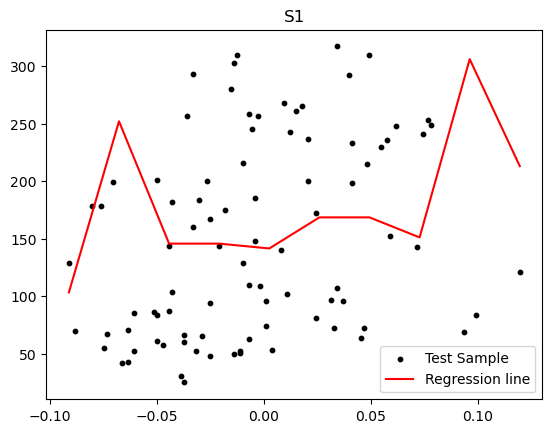

In [36]:

# S1

dt_regr.fit(X_train['s1'].values.reshape((-1,1)),y_train)
y_pred = dt_regr.predict(X_test['s1'].values.reshape((-1,1)))

line_x = np.linspace(np.min(X_test['s1']), np.max(X_test['s1']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))


plt.scatter(X_test['s1'],y_test,s=10,c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Sample','Regression line'])

plt.title('S1')


Text(0.5, 1.0, 'S2')

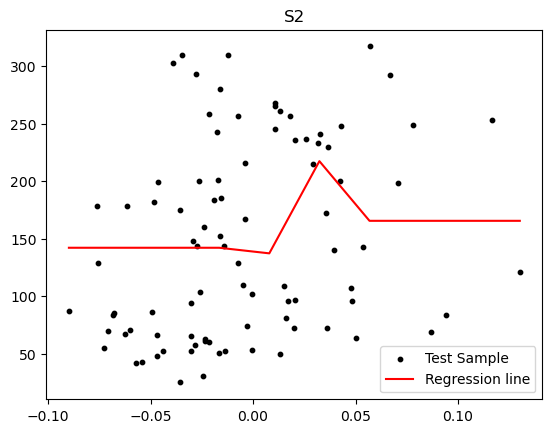

In [37]:

# S2

dt_regr.fit(X_train['s2'].values.reshape((-1,1)),y_train)
y_pred = dt_regr.predict(X_test['s2'].values.reshape((-1,1)))

line_x = np.linspace(np.min(X_test['s2']), np.max(X_test['s2']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))


plt.scatter(X_test['s2'],y_test,s=10,c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Sample','Regression line'])

plt.title('S2')


Text(0.5, 1.0, 'S3')

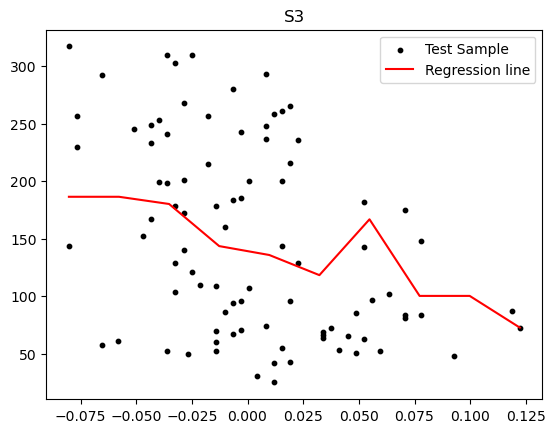

In [38]:

# s3

dt_regr.fit(X_train['s3'].values.reshape((-1,1)),y_train)
y_pred = dt_regr.predict(X_test['s3'].values.reshape((-1,1)))

line_x = np.linspace(np.min(X_test['s3']), np.max(X_test['s3']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))


plt.scatter(X_test['s3'],y_test,s=10,c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Sample','Regression line'])

plt.title('S3')


Text(0.5, 1.0, 'S4')

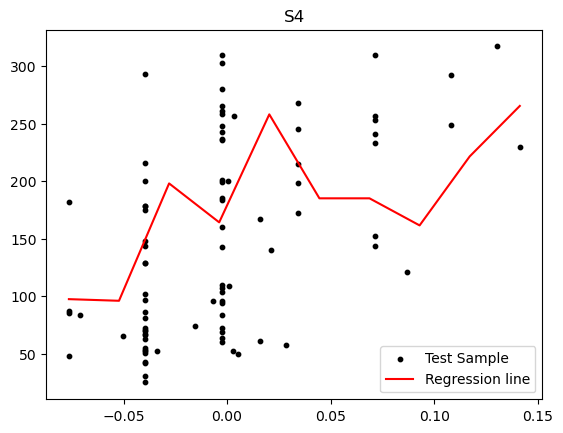

In [39]:

#  s4

dt_regr.fit(X_train['s4'].values.reshape((-1,1)),y_train)
y_pred = dt_regr.predict(X_test['s4'].values.reshape((-1,1)))

line_x = np.linspace(np.min(X_test['s4']), np.max(X_test['s4']), 10)
line_y = dt_regr.predict(line_x.reshape((-1,1)))


plt.scatter(X_test['s4'],y_test,s=10,c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Test Sample','Regression line'])

plt.title('S4')

In [40]:
mt_regre = DecisionTreeRegressor(max_depth=2)
mt_regre.fit(X_train,y_train)
y_pred = mt_regre.predict(X_test)

print('다중 결정 트리 회귀, R2: {:.2f}'.format(r2_score(y_test,y_pred)))

다중 결정 트리 회귀, R2: 0.36


In [41]:
#  Support Vector Machine Regressor

from sklearn.svm import SVR
svm_regre = SVR()
svm_regre.fit(X_train['s6'].values.reshape((-1,1)),y_train)
y_pred = svm_regre.predict(X_test['s6'].values.reshape((-1,1)))

print('단순 서포트 벡터 머신 회귀, R2: {:.2f}'.format(r2_score(y_test,y_pred)))

단순 서포트 벡터 머신 회귀, R2: 0.06


In [42]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    svm_regr = SVR(C=i)
    #  C의 값이 커지면 기존의 데이터 보다 일반화 된다. = 더 깔끔해짐
    svm_regr.fit(X_train,y_train)
    y_pred = svm_regr.predict(X_test)
    print('다중 서포트 벡터 머신 회귀,C={} R2:{:.2f}'.format(i,r2_score(y_test,y_pred)))

#  C의 값을 12개 까지 하는게 가장 좋음!

다중 서포트 벡터 머신 회귀,C=1 R2:0.17
다중 서포트 벡터 머신 회귀,C=2 R2:0.29
다중 서포트 벡터 머신 회귀,C=3 R2:0.35
다중 서포트 벡터 머신 회귀,C=4 R2:0.39
다중 서포트 벡터 머신 회귀,C=5 R2:0.42
다중 서포트 벡터 머신 회귀,C=6 R2:0.44
다중 서포트 벡터 머신 회귀,C=7 R2:0.46
다중 서포트 벡터 머신 회귀,C=8 R2:0.47
다중 서포트 벡터 머신 회귀,C=9 R2:0.48
다중 서포트 벡터 머신 회귀,C=10 R2:0.49
다중 서포트 벡터 머신 회귀,C=11 R2:0.49
다중 서포트 벡터 머신 회귀,C=12 R2:0.50
다중 서포트 벡터 머신 회귀,C=13 R2:0.50
다중 서포트 벡터 머신 회귀,C=14 R2:0.50
다중 서포트 벡터 머신 회귀,C=15 R2:0.50
다중 서포트 벡터 머신 회귀,C=16 R2:0.50
다중 서포트 벡터 머신 회귀,C=17 R2:0.50
다중 서포트 벡터 머신 회귀,C=18 R2:0.50
다중 서포트 벡터 머신 회귀,C=19 R2:0.50
다중 서포트 벡터 머신 회귀,C=20 R2:0.50


In [50]:
#  Multi Layer Perceptron Regressor

from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(hidden_layer_sizes=200, max_iter=1000)
mlp_regr.fit(X_train, y_train)
y_pred = mlp_regr.predict(X_test)
print('다중 MLP 회귀의 R2 : {:.2f}'.format(r2_score(y_test,y_pred)))

다중 MLP 회귀의 R2 : 0.48


c:\Users\Windows11\AppData\Local\Programs\Orange\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
